<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/you.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
arrest=pd.read_csv('kom.csv',index_col=[0],parse_dates=[0])

In [3]:
arrest.head()

,rate
year,
2014-01-01,5
2014-01-01,5
2014-01-01,4
2014-01-01,4
2014-01-01,4


In [4]:
type(arrest)

pandas.core.frame.DataFrame

In [0]:
series_value=arrest.values

In [6]:
type(series_value)

numpy.ndarray

In [7]:
arrest.size

362

In [8]:
arrest.describe()

,rate
count,362.000000
mean,6.237569
std,3.345965
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,12.000000


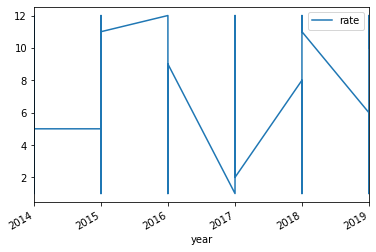

In [9]:
arrest.plot()

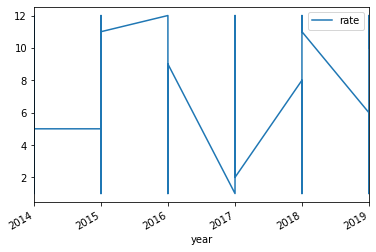

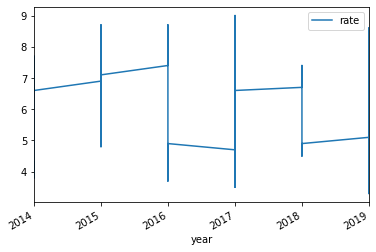

In [11]:
arrest_mean=arrest.rolling(window=10).mean()
arrest.plot()
arrest_mean.plot()

In [0]:
value=pd.DataFrame(series_value)

In [0]:
arrest_df=pd.concat([value,value.shift(1)],axis=1)

In [14]:
arrest_df.head()

,0,0
0,5,NaN
1,5,5.0
2,4,5.0
3,4,4.0
4,4,4.0


In [0]:
arrest_df.columns=['Actual_arrest','Forecast_arrest']

In [16]:
arrest_df.head()

,Actual_arrest,Forecast_arrest
0,5,NaN
1,5,5.0
2,4,5.0
3,4,4.0
4,4,4.0


In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [0]:
arrest_test=arrest_df[1:]

In [19]:
arrest_test.head()

,Actual_arrest,Forecast_arrest
1,5,5.0
2,4,5.0
3,4,4.0
4,4,4.0
5,3,4.0


In [20]:
arrest.tail()

,rate
year,
2019-01-01,11
2019-01-01,11
2019-01-01,6
2019-01-01,11
2019-01-01,10


In [0]:
arrest_test=arrest_test[0:362]

In [22]:
arrest_test.tail()

,Actual_arrest,Forecast_arrest
357,11,12.0
358,11,11.0
359,6,11.0
360,11,6.0
361,10,11.0


In [0]:
arrest_error=mean_squared_error(arrest_test.Actual_arrest,arrest_test.Forecast_arrest)

In [24]:
arrest_error

19.858725761772853

In [25]:
np.sqrt(arrest_error)

4.456313023315671

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

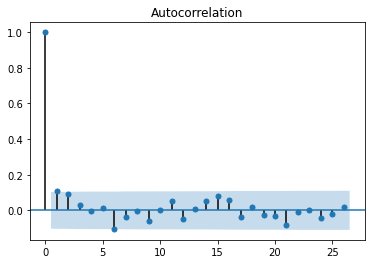

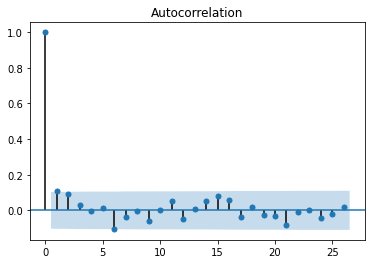

In [27]:
plot_acf(arrest)

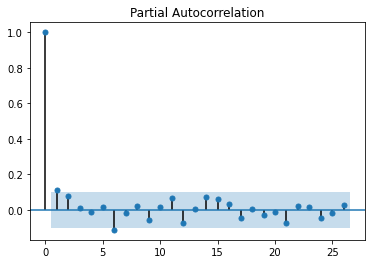

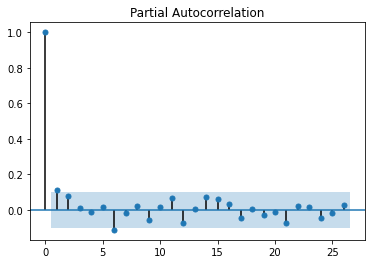

In [28]:
plot_pacf(arrest)

In [29]:
arrest.size

362

In [0]:
arrest_train=arrest[0:353]

In [0]:
arrest_test=arrest[353:363]

In [42]:
arrest_train.size

353

In [43]:
arrest_test.size

9

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
arrest_model=ARIMA(arrest_train,order=(2,0,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
arrest_model_fit=arrest_model.fit()

In [49]:
arrest_model_fit.aic

1853.166171813722

In [0]:
arrest_forecast=arrest_model_fit.forecast(steps=35)[0]

In [52]:
arrest_forecast

array([5.47282815, 5.71526005, 6.04510553, 6.11093678, 6.14252174,
       6.15161853, 6.15506591, 6.15618406, 6.1565793 , 6.15671242,
       6.15675848, 6.15677418, 6.15677958, 6.15678142, 6.15678206,
       6.15678227, 6.15678235, 6.15678237, 6.15678238, 6.15678239,
       6.15678239, 6.15678239, 6.15678239, 6.15678239, 6.15678239,
       6.15678239, 6.15678239, 6.15678239, 6.15678239, 6.15678239,
       6.15678239, 6.15678239, 6.15678239, 6.15678239, 6.15678239])

In [53]:
arrest_test

,rate
year,
2019-01-01,4
2019-01-01,12
2019-01-01,6
2019-01-01,12
2019-01-01,11
2019-01-01,11
2019-01-01,6
2019-01-01,11
2019-01-01,10


In [54]:
np.sqrt(mean_squared_error(arrest_test,arrest_forecast))

ValueError: ignored